# Unemployment Analysis With Python




### Importing Libraries


In [103]:
# importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [68]:
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [109]:
data.head(10)

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South
5,Andhra Pradesh,2020-06-30,M,3.31,19805400,47.41,South
6,Andhra Pradesh,2020-07-31,M,8.34,15431615,38.91,South
7,Andhra Pradesh,2020-08-31,M,6.96,15251776,37.83,South
8,Andhra Pradesh,2020-09-30,M,6.40,15220312,37.47,South
9,Andhra Pradesh,2020-10-31,M,6.59,15157557,37.34,South


In [110]:
data.tail(10)

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
257,West Bengal,2020-01-31,M,6.94,35820789,47.35,East
258,West Bengal,2020-02-29,M,4.92,36964178,47.74,East
259,West Bengal,2020-03-31,M,6.92,35903917,47.27,East
260,West Bengal,2020-04-30,M,17.41,26938836,39.90,East
261,West Bengal,2020-05-31,M,17.41,28356675,41.92,East
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East


In [71]:
data.shape

(267, 9)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [73]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [74]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [75]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [76]:
data2 = pd.read_csv("Unemployment in India.csv")
data2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [78]:
data2.tail(20)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
748,West Bengal,31-01-2020,Monthly,7.27,11208617.0,45.39,Urban
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban
754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data2.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [80]:
data2.dropna(inplace=True)

In [81]:
data2.tail(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
744,West Bengal,30-09-2019,Monthly,7.79,11158649.0,45.74,Urban
745,West Bengal,31-10-2019,Monthly,7.83,10563686.0,43.25,Urban
746,West Bengal,30-11-2019,Monthly,6.61,10768462.0,43.44,Urban
747,West Bengal,31-12-2019,Monthly,7.24,11335696.0,45.97,Urban
748,West Bengal,31-01-2020,Monthly,7.27,11208617.0,45.39,Urban
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [82]:
data.duplicated().sum()

0

In [89]:
# Renaming Columns
data.rename(columns={'Region':'States', 'Region.1':'Region'},inplace= True)
data.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


In [90]:
# Calculate average unemployment rate in each state using groupby
avg_unemployment_rate = data.groupby('States')[' Estimated Unemployment Rate (%)'].mean().round(2)
avg_unemployment_rate

States
Andhra Pradesh       8.66
Assam                4.86
Bihar               19.47
Chhattisgarh         7.82
Delhi               18.41
Goa                 12.17
Gujarat              6.38
Haryana             27.48
Himachal Pradesh    16.07
Jammu & Kashmir     16.48
Jharkhand           19.54
Karnataka            7.67
Kerala               9.43
Madhya Pradesh       6.85
Maharashtra          7.98
Meghalaya            3.87
Odisha               6.46
Puducherry          17.94
Punjab              11.98
Rajasthan           15.87
Sikkim               9.79
Tamil Nadu          12.19
Telangana            6.83
Tripura             25.06
Uttar Pradesh        9.74
Uttarakhand         11.16
West Bengal         10.19
Name:  Estimated Unemployment Rate (%), dtype: float64

In [91]:
# Converting the date column in to date-time format.
data[' Date'] = pd.to_datetime(df[' Date'])

In [92]:

# Defining the pre-COVID and post-COVID periods
pre_covid_data = data[data[' Date'] == "31-01-2020"]
post_covid_data = data[data[' Date'] == "31-10-2020"]

In [93]:
# Calculating the unemployment rate for each state before and after COVID-19
pre_covid_unemployment_rate = pre_covid_data.groupby('States')[' Estimated Unemployment Rate (%)'].mean().reset_index()
pre_covid_unemployment_rate["Period"] = "Pre-COVID"
post_covid_unemployment_rate = post_covid_data.groupby('States')[' Estimated Unemployment Rate (%)'].mean().reset_index()
post_covid_unemployment_rate["Period"] = "Post-COVID"

In [94]:
# Merging the pre-COVID and post-COVID DataFrames
unemployment_data = pd.concat([pre_covid_unemployment_rate, post_covid_unemployment_rate])

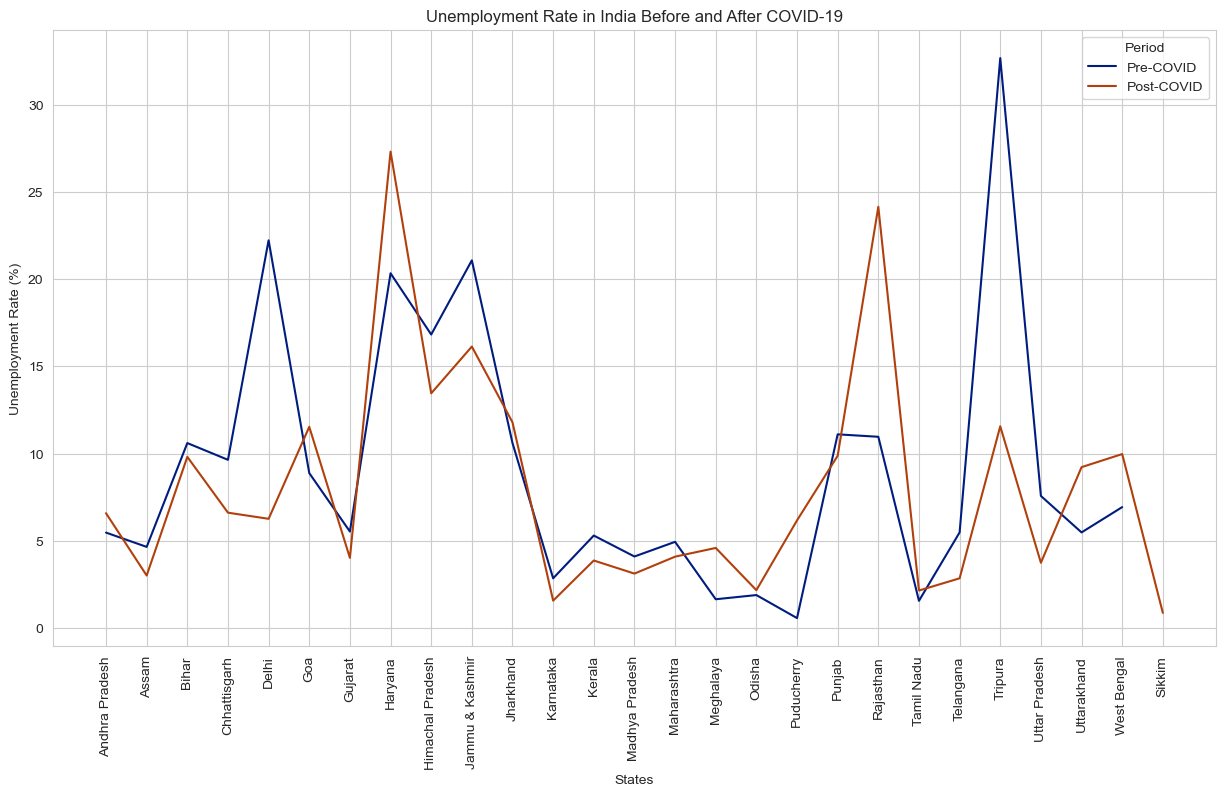

In [95]:
# Ploting the line chart
plt.figure(figsize= (15,8))
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.lineplot(x="States", y=" Estimated Unemployment Rate (%)", hue="Period", data=unemployment_data)

plt.xlabel("States")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate in India Before and After COVID-19")
plt.xticks(rotation=90)
plt.legend(title="Period")

plt.show()

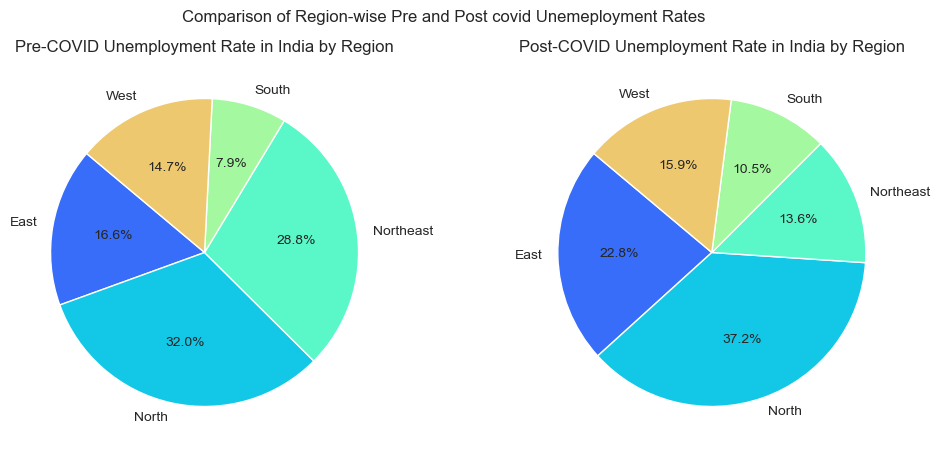

In [96]:
# Calculate the unemployment rate for each region before and after COVID-19
pre_covid_unemployment_rate = pre_covid_data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
post_covid_unemployment_rate = post_covid_data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(12,5))
sns.set_palette('rainbow')
plt.suptitle('Comparison of Region-wise Pre and Post covid Unemeployment Rates')

# Create a pie chart for pre-COVID data
plt.subplot(121)
plt.pie(pre_covid_unemployment_rate, labels=pre_covid_unemployment_rate.index, autopct='%1.1f%%', startangle=140)
plt.title("Pre-COVID Unemployment Rate in India by Region")
plt.show

# Create a pie chart for post-COVID data
plt.subplot(122)
plt.pie(post_covid_unemployment_rate, labels=post_covid_unemployment_rate.index, autopct='%1.1f%%', startangle=140)
plt.title("Post-COVID Unemployment Rate in India by Region")

plt.show()